# Data Cleaning of US Avocado Sales

**NOTE: To run certain functions, this `.ipynb` needs to be placed within the scripts folder.**

The idea here was to have a bit of a case study, taking some real world sales data to train to.

The first step is to import some useful modules.

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Now we're reading the `.csv` and pulling it into a dataframe, dropping the columns that we don't really need.

In [43]:
data = pd.read_csv('avocado.csv') # Read the data


data = data.drop(['AveragePrice', 'Unnamed: 0',
                  '4046', '4225', '4770', 'Total Bags',
                  'Small Bags', 'Large Bags', 'XLarge Bags', 
                  'type'], axis=1) # Drop the columns

data.head()


,Date,Total Volume,year,region
0,2015-12-27,64236.62,2015,Albany
1,2015-12-20,54876.98,2015,Albany
2,2015-12-13,118220.22,2015,Albany
3,2015-12-06,78992.15,2015,Albany
4,2015-11-29,51039.60,2015,Albany


We've printed out the head here. Getting the dates, total volume of avocado products sold, year and region in the US. 

Our next step below is to pull apart the data into a dictionary of dataframes, separated by region.

In [44]:
UniqueRegions = data.region.unique()
print(print("\n".join(UniqueRegions)))

RegionDict = {elem : pd.DataFrame() for elem in UniqueRegions}

for key in RegionDict.keys():
    RegionDict[key] = data[:][data.region == key]

Albany
Atlanta
BaltimoreWashington
Boise
Boston
BuffaloRochester
California
Charlotte
Chicago
CincinnatiDayton
Columbus
DallasFtWorth
Denver
Detroit
GrandRapids
GreatLakes
HarrisburgScranton
HartfordSpringfield
Houston
Indianapolis
Jacksonville
LasVegas
LosAngeles
Louisville
MiamiFtLauderdale
Midsouth
Nashville
NewOrleansMobile
NewYork
Northeast
NorthernNewEngland
Orlando
Philadelphia
PhoenixTucson
Pittsburgh
Plains
Portland
RaleighGreensboro
RichmondNorfolk
Roanoke
Sacramento
SanDiego
SanFrancisco
Seattle
SouthCarolina
SouthCentral
Southeast
Spokane
StLouis
Syracuse
Tampa
TotalUS
West
WestTexNewMexico
None


Once we now have these separated dataframes, we want annual data so we can go one step further. We'll do this for a single region for the proof of concept. Here below, we're just probing into Denver's data and can see that there are four different years here and a 'None'.

In [102]:
denver_data = RegionDict[UniqueRegions[12]]
boston_data = RegionDict[UniqueRegions[3]]

denver_data.head()

UniqueYear = denver_data.year.unique()
print(print("\n".join(UniqueYear.astype(str))))

2015
2016
2017
2018
None


So we've decided to go for Boston, because why not, they have great road signs after all.

In [113]:
boston_data = RegionDict[UniqueRegions[4]]

UniqueYear = boston_data.year.unique()
print(print("\n".join(UniqueYear.astype(str))))

boston_dict = {elem : pd.DataFrame() for elem in UniqueYear}

for key in boston_dict.keys():
    boston_dict[key] = boston_data[:][boston_data.year == key]

boston_2015 = boston_dict[UniqueYear[0]]
boston_2016 = boston_dict[UniqueYear[1]]
boston_2017 = boston_dict[UniqueYear[2]]
boston_2018 = boston_dict[UniqueYear[3]]


len(boston_2015)

2015
2016
2017
2018
None


104

In [114]:
for i in range(len(UniqueYear)):
    df = boston_dict[UniqueYear[i]]
    df = df.sort_index(ascending=False)
    df = df[52:]
    df.reset_index(inplace=True, drop=True)
    df['index'] = df.index 
    boston_dict[UniqueYear[i]] = df
    
    
boston_2015 = boston_dict[UniqueYear[0]]
boston_2016 = boston_dict[UniqueYear[1]]
boston_2017 = boston_dict[UniqueYear[2]]
boston_2018 = boston_dict[UniqueYear[3]]
    

In [116]:

plt.figure(figsize=(20,10))

ax1 = boston_2015.plot.scatter(x='index', y='Total Volume', title='Uncleaned data', label='2015 data');
ax2 = boston_2016.plot.scatter(x='index', y='Total Volume', color='red', ax=ax1, label='2016 data');
ax3 = boston_2017.plot.scatter(x='index', y='Total Volume', color='green', ax=ax1, label='2017 data');
ax4 = boston_2018.plot.scatter(x='index', y='Total Volume', color='orange', ax=ax1, label='2018 data');

<Figure size 2000x1000 with 0 Axes>

In [123]:
boston_2017.head()

,Date,Total Volume,year,region,index
0,2017-12-31,25275.08,2017,Boston,0
1,2017-01-01,458830.49,2017,Boston,1
2,2017-01-08,730358.49,2017,Boston,2
3,2017-01-15,577976.65,2017,Boston,3
4,2017-01-22,663735.14,2017,Boston,4


It is clear that some things are amiss here. So we ordered the data so that the index is synonymous with week number for a given year. We can see however that there are over 100 weeks.

We can see that the data that looks a bit more right seems to be in the second half of the plot. Additionally, 2018 seems to not have enough data points to cover the whole year. Lets try again with 2015-2017.

In [84]:

# Uncomment for a longer view of what we have now


# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     print(boston_2015)

The cell below is grabbing everything past the centre of the previous data

<Figure size 2000x1000 with 0 Axes>

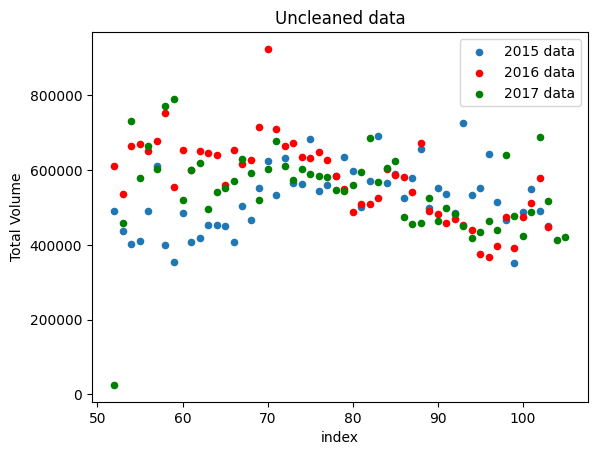

In [106]:
boston_2015 = boston_2015[52:]
boston_2016 = boston_2016[52:]
boston_2017 = boston_2017[52:]

plt.figure(figsize=(20,10))

ax1 = boston_2015.plot.scatter(x='index', y='Total Volume', title='Uncleaned data', label='2015 data');
ax2 = boston_2016.plot.scatter(x='index', y='Total Volume', color='red', ax=ax1, label='2016 data');
ax3 = boston_2017.plot.scatter(x='index', y='Total Volume', color='green', ax=ax1, label='2017 data');
# ax4 = boston_2018.plot.scatter(x='index', y='Total Volume', color='orange', ax=ax1, label='2018 data');

In [55]:
boston_2015 = boston_2015.sort_index(ascending=False)

boston_2015.reset_index(inplace=True, drop=True)


boston_2015['index'] = boston_2015.index


boston_final = (boston_2015[52:])

<Figure size 2000x1000 with 0 Axes>

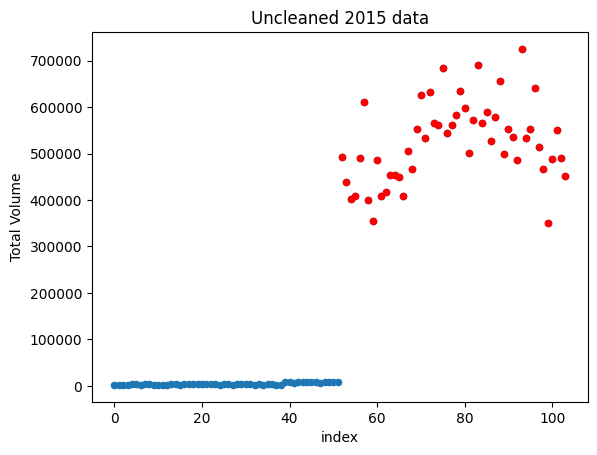

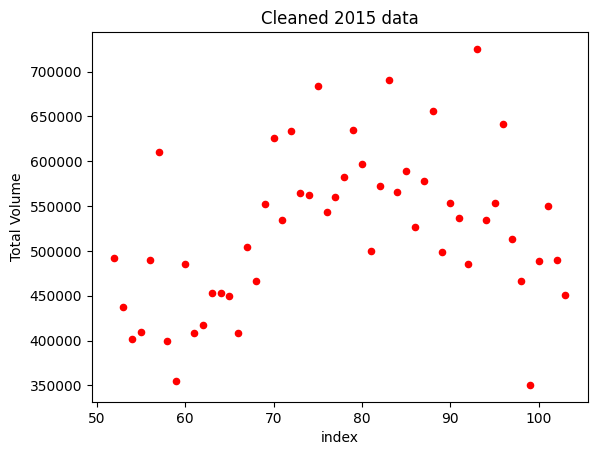

In [79]:

plt.figure(figsize=(20,10))

ax2 = boston_2015.plot.scatter(x='index', y='Total Volume', title='Uncleaned 2015 data')
ax1 = boston_final.plot.scatter(x='index', y='Total Volume', color='red', ax=ax2);


ax1 = boston_final.plot.scatter(x='index', y='Total Volume', title='Cleaned 2015 data', color='red');



In [80]:
import utils, dictionary
import train

In [20]:
env = train.create_env(env_string='IM1', env_seed=42)

In [21]:
market_demand = (boston_final['Total Volume'].values / 10_000).astype(int)

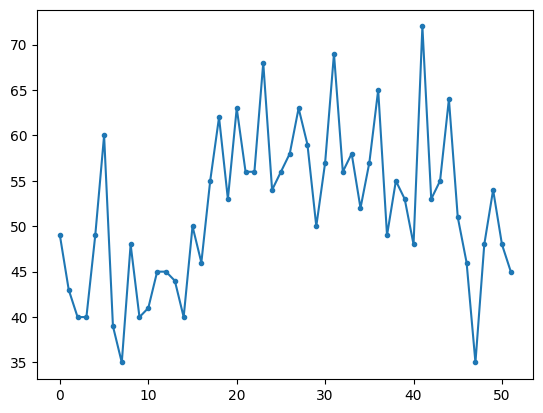

In [22]:
plt.plot(market_demand,'.-')

Here I'm setting the environment up to be a year, with 52 weeks and am sampling the 2015 Boston avocado sales.

In [23]:
env.periods = 52
env.user_D = market_demand.astype(int)

env.dist = 5

env.I0 = [market_demand[0], market_demand[1], market_demand[2]]

env.demand_dist = market_demand.astype(int)


env.D = np.zeros(env.periods)



In [24]:



"""  # simulation result lists
        self.I=np.zeros([periods + 1, m - 1]) # inventory at the beginning of each period (last stage not included since iventory is infinite)
        self.T=np.zeros([periods + 1, m - 1]) # pipeline inventory at the beginning of each period (no pipeline inventory for last stage)
        self.R=np.zeros([periods, m - 1]) # replenishment order (last stage places no replenishment orders)
        self.D=np.zeros(periods) # demand at retailer
        self.S=np.zeros([periods, m]) # units sold
        self.B=np.zeros([periods, m]) # backlog (includes top most production site in supply chain)
        self.LS=np.zeros([periods, m]) # lost sales
        self.P=np.zeros(periods) # profit"""
        
len(env.P)

30

In [25]:
len(env.D)

52

In [26]:
# Lets save to a new dir
import os

# if not os.path.exists('/avocado/'):
#     os.makedirs('avocado/')
    
#     
 
filepath = os.getcwd() + '/avocado/'
   
# A new env has already been created, lets monitor it. 
    
env = train.Monitor(env, filename=filepath) 

# Create model, a ARS model as they generally train pretty quickly 
model = train.create_model('ARS', env)

# Create callback
callback = train.get_callback(env, filepath)

# Train model
model = train.train_model(model, env, 100_000, callback=callback)


Output()

Eval num_timesteps=10000, episode_reward=369.30 +/- 0.00

Episode length: 30.00 +/- 0.00

New best mean reward!

Eval num_timesteps=20000, episode_reward=353.76 +/- 0.00

Episode length: 30.00 +/- 0.00

Eval num_timesteps=30000, episode_reward=583.67 +/- 0.00

Episode length: 30.00 +/- 0.00

New best mean reward!

Eval num_timesteps=40000, episode_reward=568.92 +/- 0.00

Episode length: 30.00 +/- 0.00

Eval num_timesteps=50000, episode_reward=587.32 +/- 0.00

Episode length: 30.00 +/- 0.00

New best mean reward!

Eval num_timesteps=60000, episode_reward=601.98 +/- 0.00

Episode length: 30.00 +/- 0.00

New best mean reward!

Eval num_timesteps=70000, episode_reward=601.92 +/- 0.00

Episode length: 30.00 +/- 0.00

Eval num_timesteps=80000, episode_reward=602.66 +/- 0.00

Episode length: 30.00 +/- 0.00

New best mean reward!

Eval num_timesteps=90000, episode_reward=602.49 +/- 0.00

Episode length: 30.00 +/- 0.00

Eval num_timesteps=100000, episode_reward=602.49 +/- 0.00

Episode length: 30.00 +/- 0.00

In [41]:
env.I

array([[100., 100., 200.],
       [ 51.,   0., 110.],
       [  8.,   0.,  20.],
       [  0.,   0.,   0.],
       [ 60.,   0.,   0.],
       [ 11.,   0.,   0.],
       [  0.,  90.,   0.],
       [  0.,  90.,   0.],
       [  0.,  20.,   0.],
       [  0.,   0.,   0.],
       [ 50.,   0.,   0.],
       [ 99.,   0.,  80.],
       [ 74.,   0.,  80.],
       [ 29.,   0.,  80.],
       [  0.,   0.,  80.],
       [  0.,   0.,  80.],
       [  0.,   0.,  80.],
       [  0.,  80.,  80.],
       [  0.,  80.,   0.],
       [  0.,  80.,   0.],
       [  0.,  80.,   0.],
       [ 17.,  80.,   0.],
       [ 41.,  80.,   0.],
       [ 65.,  80.,   0.],
       [ 77.,   0.,   0.],
       [103.,   0.,   0.],
       [127.,   0.,   0.],
       [149.,   0.,   0.],
       [ 86.,   0.,   0.],
       [ 27.,   0.,   0.],
       [  0.,   0.,   0.]])

In [28]:
import eval

In [36]:
# env.reset()

# env.periods

# len(env.D)

# env.D = np.zeros(env.periods)

env.

AttributeError: 'InvManagementLostSalesEnv' object has no attribute 'X'

In [30]:
env.periods

52

<AxesSubplot: title={'center': 'Demand'}>

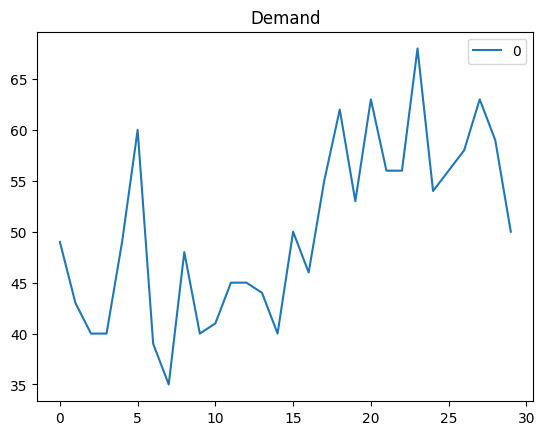

In [37]:
df = getattr(env, 'D')
pd.DataFrame(df).plot(title='Demand')


<AxesSubplot: title={'center': 'Profit'}>

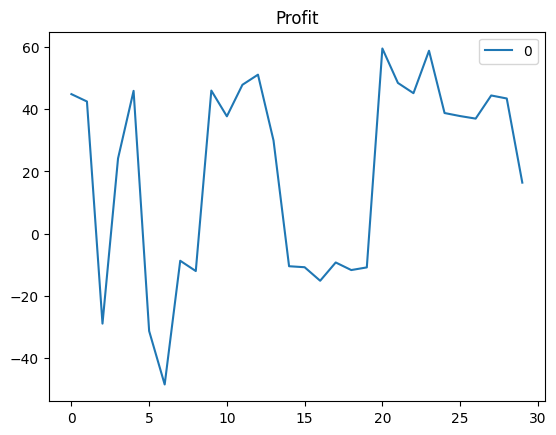

In [39]:
df = getattr(env, 'P')
pd.DataFrame(df).plot(title = 'Profit')


<AxesSubplot: title={'center': 'Pipeline Inventory'}>

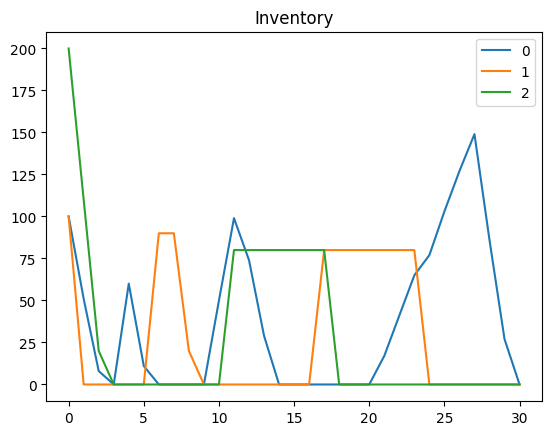

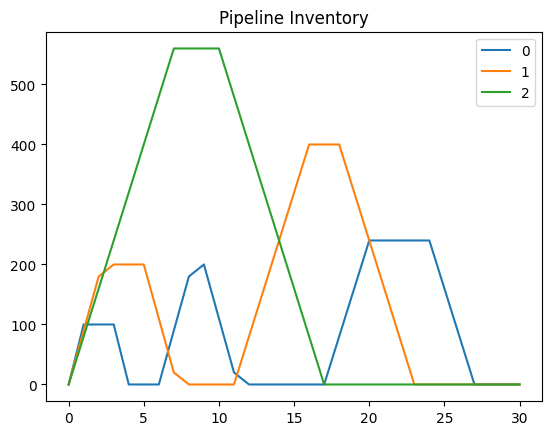

In [40]:
df = getattr(env, 'I')
pd.DataFrame(df).plot(title='Inventory')
df = getattr(env, 'T')
pd.DataFrame(df).plot(title='Pipeline Inventory')

In [32]:




study = eval.Evaluate(env, model, 10)

study.run(filepath)

AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'